In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

# import data from csv
df = pd.read_csv('/content/drive/My Drive/Bellevue University/DSC410 Predictive Analytics/travel_insurance.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# view raw data
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [61]:
# check for missing values
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

Per the above code, it appears the Gender column is missing data in approx. 70% of the fields. Because of this, I deem the column irrelevant to our model and will remove it completely.

In [62]:
# drop Gender column
df = df.drop(columns=['Gender'])
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,63


Now I will rename the column headers to be more palatable.

In [63]:
# rename columns
df = df.rename(columns={"Agency": "agency",
                   "Agency Type": "agency_type",
                   "Distribution Channel": "distribution_channel",
                   "Product Name": "product_name",
                   "Claim": "claim",
                   "Duration": "duration",
                   "Destination": "destination",
                   "Net Sales": "net_sales",
                   "Commision (in value)": "commission_in_value",
                   "Age": "age"})
df.head()

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commission_in_value,age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


Now I will review all of the columns with categorical data to see what type of transformation will be needed, if any, to make them fit for the model.

In [64]:
df.agency.unique()

array(['CBH', 'CWT', 'JZI', 'KML', 'EPX', 'C2B', 'JWT', 'RAB', 'SSI',
       'ART', 'CSR', 'CCR', 'ADM', 'LWC', 'TTW', 'TST'], dtype=object)

In [65]:
df.dtypes

agency                   object
agency_type              object
distribution_channel     object
product_name             object
claim                    object
duration                  int64
destination              object
net_sales               float64
commission_in_value     float64
age                       int64
dtype: object

In [66]:
df.agency_type.unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [67]:
df.distribution_channel.unique()

array(['Offline', 'Online'], dtype=object)

In [68]:
df.product_name.unique()

array(['Comprehensive Plan', 'Rental Vehicle Excess Insurance',
       'Value Plan', 'Basic Plan', 'Premier Plan',
       '2 way Comprehensive Plan', 'Bronze Plan', 'Silver Plan',
       'Annual Silver Plan', 'Cancellation Plan',
       '1 way Comprehensive Plan', 'Ticket Protector', '24 Protect',
       'Gold Plan', 'Annual Gold Plan',
       'Single Trip Travel Protect Silver',
       'Individual Comprehensive Plan',
       'Spouse or Parents Comprehensive Plan',
       'Annual Travel Protect Silver',
       'Single Trip Travel Protect Platinum',
       'Annual Travel Protect Gold', 'Single Trip Travel Protect Gold',
       'Annual Travel Protect Platinum', 'Child Comprehensive Plan',
       'Travel Cruise Protect', 'Travel Cruise Protect Family'],
      dtype=object)

In [69]:
df.claim.unique()

array(['No', 'Yes'], dtype=object)

In [70]:
df.destination.unique()

array(['MALAYSIA', 'AUSTRALIA', 'ITALY', 'UNITED STATES', 'THAILAND',
       "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF", 'NORWAY', 'VIET NAM',
       'DENMARK', 'SINGAPORE', 'JAPAN', 'UNITED KINGDOM', 'INDONESIA',
       'INDIA', 'CHINA', 'FRANCE', 'TAIWAN, PROVINCE OF CHINA',
       'PHILIPPINES', 'MYANMAR', 'HONG KONG', 'KOREA, REPUBLIC OF',
       'UNITED ARAB EMIRATES', 'NAMIBIA', 'NEW ZEALAND', 'COSTA RICA',
       'BRUNEI DARUSSALAM', 'POLAND', 'SPAIN', 'CZECH REPUBLIC',
       'GERMANY', 'SRI LANKA', 'CAMBODIA', 'AUSTRIA', 'SOUTH AFRICA',
       'TANZANIA, UNITED REPUBLIC OF', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'NEPAL', 'NETHERLANDS', 'MACAO', 'CROATIA', 'FINLAND', 'CANADA',
       'TUNISIA', 'RUSSIAN FEDERATION', 'GREECE', 'BELGIUM', 'IRELAND',
       'SWITZERLAND', 'CHILE', 'ISRAEL', 'BANGLADESH', 'ICELAND',
       'PORTUGAL', 'ROMANIA', 'KENYA', 'GEORGIA', 'TURKEY', 'SWEDEN',
       'MALDIVES', 'ESTONIA', 'SAUDI ARABIA', 'PAKISTAN', 'QATAR', 'PERU',
       'LUXEMBOURG',

I'll first handle our target column claim by converting the Yes/No string variables with 1 or 0 ints respectively.

In [71]:
# convert target column 'claim' to be binary ints to represent the Yes/No
df['claim'] = df['claim'].map({'Yes': 1, 'No': 0})
df

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commission_in_value,age
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,0,111,JAPAN,35.0,12.25,31
63322,JZI,Airlines,Online,Basic Plan,0,58,CHINA,40.0,14.00,40
63323,JZI,Airlines,Online,Basic Plan,0,2,MALAYSIA,18.0,6.30,57
63324,JZI,Airlines,Online,Basic Plan,0,3,VIET NAM,18.0,6.30,63


I will now complete one-hot encoding on the agency_type and distribution_channel columns as there are only two variables within each.

In [72]:
# one hot encoding using get_dummies()
df = pd.get_dummies(df, columns = ['agency_type', 'distribution_channel'])
df = df.rename(columns={"agency_type_Travel Agency": "agency_type_Travel_Agency"})
df

,agency,product_name,claim,duration,destination,net_sales,commission_in_value,age,agency_type_Airlines,agency_type_Travel_Agency,distribution_channel_Offline,distribution_channel_Online
0,CBH,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,81,0,1,1,0
1,CBH,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,71,0,1,1,0
2,CWT,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,32,0,1,0,1
3,CWT,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,32,0,1,0,1
4,CWT,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,41,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Basic Plan,0,111,JAPAN,35.0,12.25,31,1,0,0,1
63322,JZI,Basic Plan,0,58,CHINA,40.0,14.00,40,1,0,0,1
63323,JZI,Basic Plan,0,2,MALAYSIA,18.0,6.30,57,1,0,0,1
63324,JZI,Basic Plan,0,3,VIET NAM,18.0,6.30,63,1,0,0,1


Now for the agency, agency_type, product_name, and destination columns I will perform frequency encoding to replace their values with numerical values based on how frequent they appear within the column. This will allow us to use the values in our model while avoiding one-hot encoding since that would stretch our dataframe way too wide based on the number of unique values present in each.

In [73]:
df = df.replace(df.agency.value_counts(normalize=True).to_dict())
df = df.replace(df.product_name.value_counts(normalize=True).to_dict())
df = df.replace(df.destination.value_counts(normalize=True).to_dict())
df

,agency,product_name,claim,duration,destination,net_sales,commission_in_value,age,agency_type_Airlines,agency_type_Travel_Agency,distribution_channel_Offline,distribution_channel_Online
0,0.001595,0.005748,0,186,0.093642,-29.0,9.57,81,0,1,1,0
1,0.001595,0.005748,0,186,0.093642,-29.0,9.57,71,0,1,1,0
2,0.135489,0.135489,0,65,0.058333,-49.5,29.70,32,0,1,0,1
3,0.135489,0.135489,0,60,0.058333,-39.6,23.76,32,0,1,0,1
4,0.135489,0.135489,0,79,0.007185,-19.8,11.88,41,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0.099943,0.086363,0,111,0.032546,35.0,12.25,31,1,0,0,1
63322,0.099943,0.086363,0,58,0.075735,40.0,14.00,40,1,0,0,1
63323,0.099943,0.086363,0,2,0.093642,18.0,6.30,57,1,0,0,1
63324,0.099943,0.086363,0,3,0.026356,18.0,6.30,63,1,0,0,1


Our columns all now appear to be fit to use for creating our first model!

<Axes: >

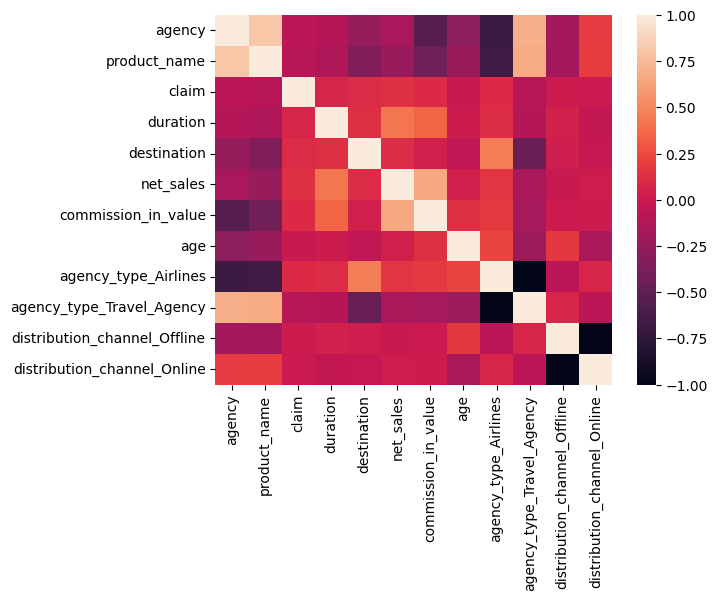

In [75]:
sns.heatmap(df.corr())

In [76]:
feature_columns = ['agency', 'product_name', 'duration', 'destination', 'net_sales', 'commission_in_value',
                   'age', 'agency_type_Airlines', 'agency_type_Travel_Agency', 'distribution_channel_Offline', 'distribution_channel_Online']
X = df[feature_columns] # features
y = df.claim # target

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[15622,     3],
       [  207,     0]])

In [79]:
target_names = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99     15625
           0       0.00      0.00      0.00       207

    accuracy                           0.99     15832
   macro avg       0.49      0.50      0.50     15832
weighted avg       0.97      0.99      0.98     15832



In [80]:
print("Model Score: %.3f" % model.score(X_test, y_test))

Model Score: 0.987
